In [89]:
import numpy as np
from matplotlib import pyplot as plt

In [90]:
def f_sun(lat, lat_t=-23.5):
    x = (lat-lat_t)*np.pi/180.0
    y = np.cos(x)
    z = np.where(y>0, y, 0.0)
    return z/sum(np.diff(lat)[0]*z)

In [91]:
lat = np.linspace(-90.0, 90.0, 1000)
irrad = f_sun(lat)


In [128]:
def G(lat, m = -40.0, s = 5.0):
    e = -0.5*((lat-m)/s)**2.0
    y = np.exp(e)
    return y/sum(np.diff(lat)[0]*y)

In [129]:
nut = G(lat)

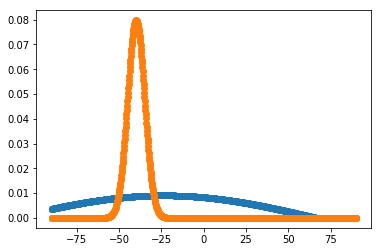

In [130]:
plt.plot(lat, irrad, 'o')
plt.plot(lat, nut, 'o')
plt.show()

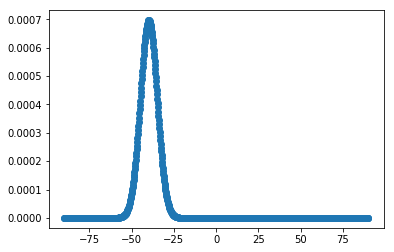

In [131]:
overlap = nut*irrad
plt.plot(lat, overlap, 'o')
plt.show()

In [166]:
N = 1000
overlap = np.zeros(N)
asym = np.zeros(N)
m = np.linspace(-90.0, 90.0, N)
for i in range(N):
    nut = G(lat, m[i], s=5.0)
    irrad = f_sun(lat)
    overlap[i] = sum(nut*irrad)
    mean_i = int(np.where(lat==m[i])[0])
    asym[i] = sum(nut[:mean_i]*irrad[:mean_i])/(sum(nut[mean_i:]*irrad[mean_i:])+1e-14)
  

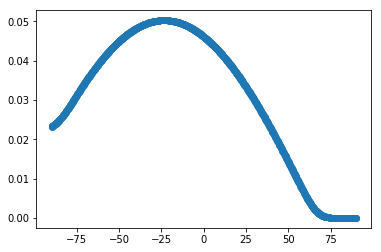

In [161]:
plt.plot(m, overlap,  'o')
plt.show()

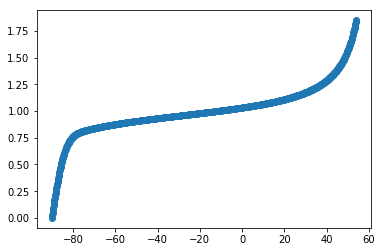

In [168]:
plt.plot(m[:-200], asym[:-200], 'o')
plt.show()

In [165]:
mean_i

999